# 第七章 K近邻算法

# 1.K近邻算法简单代码演示

In [1]:
import pandas as pd
df = pd.read_excel('葡萄酒.xlsx')
df

,原始样本,酒精含量(%),苹果酸含量(%),分类
0,样本1,5,2,0
1,样本2,6,1,0
2,样本3,4,1,0
3,样本4,8,3,1
4,样本5,10,2,1


In [2]:
# 特征变量和目标变量的切分
X_train = df[['酒精含量(%)','苹果酸含量(%)']]
y_train = df['分类']  

In [3]:
# 模型训练
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)  
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [4]:
# 模型预测：预测单个样本
X_test = [[7, 1]]  # X_test为测试集特征变量
answer = knn.predict(X_test)  
print(answer)

[0]


In [5]:
# 模型预测：预测多个样本
X_test = [[7, 1], [8, 3]]  # 这里能帮助理解为什么要写成二维数组的样式
answer = knn.predict(X_test)  
print(answer)

[0 1]


补充知识点：K近邻算法回归模型

In [6]:
from sklearn.neighbors import KNeighborsRegressor
X = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
y = [1, 2, 3, 4, 5]

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, y)

print(model.predict([[5, 5]]))

[2.5]


# 2.数据归一化代码演示

2.1 min-max标准化

In [7]:
import pandas as pd
df = pd.read_excel('葡萄酒2.xlsx')
X = df[['酒精含量(%)','苹果酸含量(%)']]
y = df['分类']  

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_new = MinMaxScaler().fit_transform(X)
X_new

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.16666667, 0.5       ],
       [0.33333333, 0.        ],
       [0.        , 0.        ],
       [0.66666667, 1.        ],
       [1.        , 0.5       ]])

2.2 Z-score标准化

In [9]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)
X_new

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.74278135,  0.26726124],
       [-0.27854301, -1.06904497],
       [-1.2070197 , -1.06904497],
       [ 0.64993368,  1.60356745],
       [ 1.57841037,  0.26726124]])

# 3.案例实战 - 手写数字识别模型

In [10]:
# 1.读取数据
import pandas as pd
df = pd.read_excel('手写字体识别.xlsx')
df.head()

,对应数字,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 2.提取特征变量和目标变
X = df.drop(columns='对应数字') 
y = df['对应数字']

In [12]:
# 3.划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
# 4.模型搭建
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
# 5.模型预测 - 预测数据结果
y_pred = knn.predict(X_test)
print(y_pred[0:100])

[5 3 7 8 9 2 1 4 5 8 9 5 9 3 3 2 3 7 9 1 0 0 7 6 6 7 0 9 6 9 1 8 6 9 2 5 2
 4 5 8 3 6 9 4 9 2 7 3 4 9 5 6 7 3 3 8 3 1 5 3 6 7 5 0 3 7 1 4 9 1 5 1 2 6
 9 1 9 5 5 9 2 8 8 4 4 9 4 3 9 8 0 3 4 3 6 8 5 2 9 0]


In [15]:
a = pd.DataFrame()  # 创建一个空DataFrame 
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
a.head()

,预测值,实际值
0,5,5
1,3,3
2,7,7
3,8,8
4,9,9


In [16]:
# 预测准确度评估
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.979328165374677

In [17]:
# 模型自带的score()函数也可以进行打分
score = knn.score(X_test, y_test)
score

0.979328165374677

# 4.补充知识点：图像识别原理详解

4.1 图片大小调整及显示

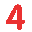

In [18]:
from PIL import Image
img = Image.open('数字4.png')
img = img.resize((32,32))
img.show()
img

4.2 图片灰度处理

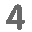

In [19]:
img = img.convert('L')
img

4.3 图片二值化处理

In [20]:
# 二值化处理
import numpy as np
img_new = img.point(lambda x: 0 if x > 128 else 1)
arr = np.array(img_new)

# 打印arr中的每一行
for i in range(arr.shape[0]):
    print(arr[i])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0

4.4 二维数组转一维数组

In [21]:
arr_new = arr.reshape(1, -1)
arr_new

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [22]:
print(arr_new.shape)

(1, 1024)


此时我们可以把这个处理过的图片“数字4”传入到我们上面训练好的knn模型中

In [23]:
answer = knn.predict(arr_new) 
print('图片中的数字为：' + str(answer[0]))

图片中的数字为：4


# 5.代码汇总与测试

In [24]:
# 主要分为三步，第一步训练模型，第二步处理图片，第三步导入模型并预测
# 1.训练模型
# 1.1 读取数据
import pandas as pd
df = pd.read_excel('手写字体识别.xlsx')

# 1.2 提取特征变量和目标变量
X = df.drop(columns='对应数字') 
y = df['对应数字']   

# 1.3 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# 1.4 训练模型
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=5) 
knn.fit(X_train, y_train)  # 自此手写字体识别模型便搭建好了

# 2.处理图片
# 2.1 图片读取 & 大小调整 & 灰度处理
from PIL import Image
img = Image.open('测试图片.png')  # 这里传入手写的图片，注意写对文件路径
img = img.resize((32,32))
img = img.convert('L')

# 2.2 图片二值化处理 & 二维数据转一维数据
import numpy as np
img_new = img.point(lambda x: 0 if x > 128 else 1)
arr = np.array(img_new)
arr_new = arr.reshape(1, -1)

# 3.预测手写数字
answer = knn.predict(arr_new) 
print('图片中的数字为：' + str(answer[0]))

图片中的数字为：1
